# Gulyi Mikhail

# Exploring handwritten digit classification

In [1]:
import datetime
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [2]:
batch_size = 128
num_classes = 10
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3
now = datetime.datetime.now

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)
input_shape    

(28, 28, 1)

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

3


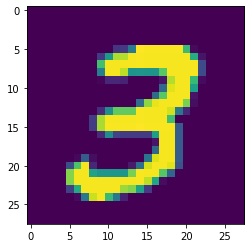

In [5]:
plt.imshow(x_train[7])
print(y_train[7])

In [6]:
input_shape

(28, 28, 1)

In [7]:
model_1 = Sequential()
model_1.add(Conv2D(filters, kernel_size,
            padding='valid', input_shape=input_shape))
model_1.add(Activation('relu'))
model_1.add(Conv2D(filters, kernel_size))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=pool_size))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(128))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [9]:
def train_model(model, train, test, num_classes, epochs):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [ ]:
import tensorflow as tf

In [10]:
with tf.device('/GPU:0'):
    train_model(model=model_1, train=(x_train, y_train), test=(
        x_test, y_test), num_classes=num_classes, epochs=100)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/100
469/469 [==============================] - 5s 6ms/step - loss: 2.2948 - accuracy: 0.1234 - val_loss: 2.2849 - val_accuracy: 0.1635
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 2.2799 - accuracy: 0.1672 - val_loss: 2.2671 - val_accuracy: 0.3023
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 2.2620 - accuracy: 0.2237 - val_loss: 2.2452 - val_accuracy: 0.4533
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 2.2400 - accuracy: 0.2783 - val_loss: 2.2173 - val_accuracy: 0.5629
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 2.2113 - accuracy: 0.3243 - val_loss: 2.1809 - val_accuracy: 0.6360
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 2.1733 - accuracy: 0.3685 - val_loss: 2.1320 - val_accuracy: 0.6799
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - 

True value: 6
Predicted value: 6


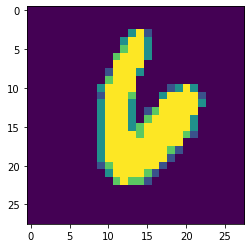

In [79]:
from random import randint
import numpy as np
random_number = randint(0, x_test.shape[0]-1)
plt.imshow(x_test[random_number])
print('True value:', y_test[random_number])
val = x_test[random_number, np.newaxis]
val = val.reshape((val.shape[0],) + input_shape)
val.shape
val = val.astype('float32')
val /= 255
prediction = model_1.predict(val)[0]
print('Predicted value:', np.argmax(prediction))


True value: 4
Predicted value: 4


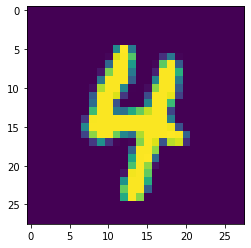

In [80]:
random_number = randint(0, x_test.shape[0]-1)
plt.imshow(x_test[random_number])
print('True value:', y_test[random_number])
val = x_test[random_number, np.newaxis]
val = val.reshape((val.shape[0],) + input_shape)
val.shape
val = val.astype('float32')
val /= 255
prediction = model_1.predict(val)[0]
print('Predicted value:', np.argmax(prediction))

True value: 3
Predicted value: 7


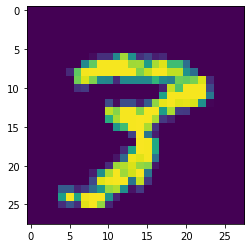

In [81]:
random_number = randint(0, x_test.shape[0]-1)
plt.imshow(x_test[random_number])
print('True value:', y_test[random_number])
val = x_test[random_number, np.newaxis]
val = val.reshape((val.shape[0],) + input_shape)
val.shape
val = val.astype('float32')
val /= 255
prediction = model_1.predict(val)[0]
print('Predicted value:', np.argmax(prediction))